In [11]:
# Libaries
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import MinMaxScaler
from itertools import cycle

In [2]:
# Data
df_c = pd.read_csv("../data/processed/b2c_orders_clean.csv") # c = clean
L_6 = pd.read_pickle("../data/processed/L_6_test.pkl")

## Autocorrelation

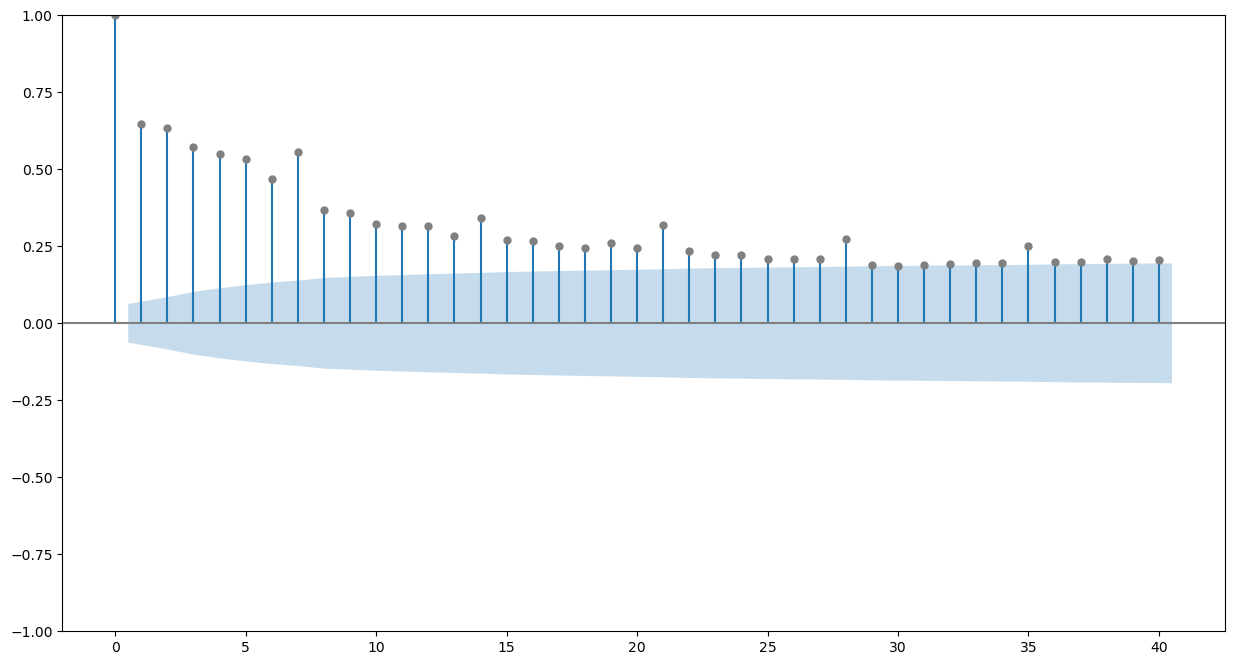

In [3]:
# Plot the autocorrelation
fig, ax = plt.subplots(figsize=(15, 8))
plot_acf(L_6['quantity'], lags=40, ax=ax, color='grey')
ax.set_title('')
# Save the figure
#plt.savefig("../data/figures/autocorrelation.png", dpi=300)
plt.show()

## Median Orders Per Time Window

In [4]:
# Aggregate Data
df_c["date"] = pd.to_datetime(df_c.date)
df_c_agg = df_c.groupby("date",as_index=False).sum()

In [9]:
# Total Sales per Weekdays
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Total Sales per Week 
df_week_days = df_c_agg.groupby(df_c_agg["date"].dt.day_name()).median().reindex(weekdays)
#df_week_days.reindex(weekdays).head()

# Total Sales per Week of year
df_week = df_c_agg.groupby(df_c_agg["date"].dt.week).median()

# Total Sales per Month 
df_month = df_c_agg.groupby(df_c_agg["date"].dt.month).median()

# Total Sales per Day of Year
df_day_year = df_c_agg.groupby(df_c_agg["date"].dt.dayofyear).median()

# Day of Month 
df_day_month = df_c_agg.groupby(df_c_agg["date"].dt.day).median()

# Week of Month
df_c_agg['tm_dm'] = df_c_agg.date.dt.day.astype(np.int8)  # Day of month
df_c_agg['tm_wm'] = df_c_agg['tm_dm'].apply(lambda x: math.ceil(x / 7)).astype(np.int8)  # number of week in month
df_week_month = df_c_agg.groupby("tm_wm").median()

/var/folders/d1/4c4_qxp904j46j9r74vbnkd80000gn/T/ipykernel_8198/1942966071.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_week = df_c_agg.groupby(df_c_agg["date"].dt.week).median()


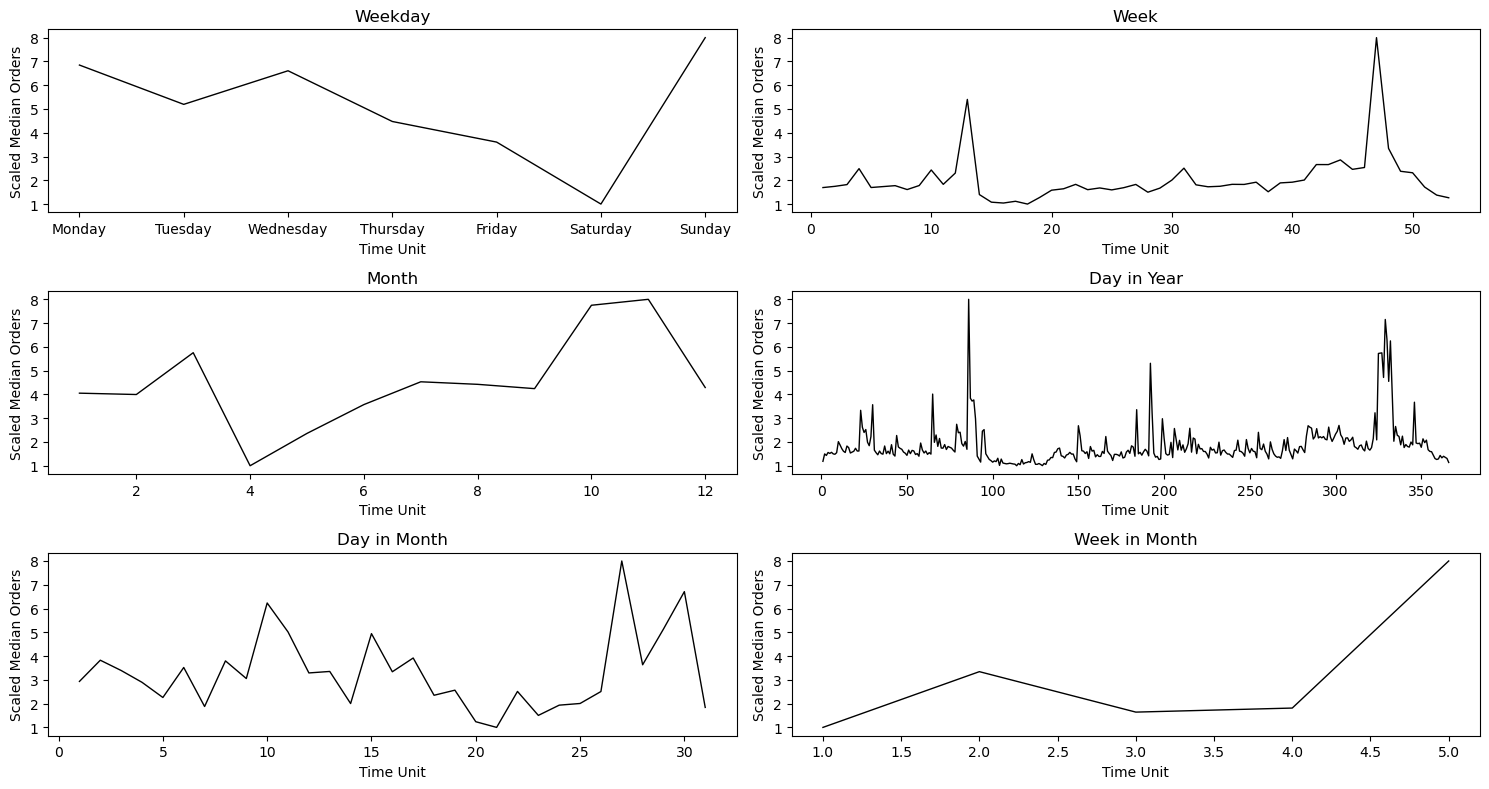

In [12]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Color
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Get Graphs for different time frames 
example_df = [df_week_days, df_week, df_month, df_day_year, df_day_month, df_week_month]
title_g = ["Weekday", "Week", "Month", "Day in Year", "Day in Month", "Week in Month"]

fig, axs = plt.subplots(3, 2, figsize=(15, 8))
axs = axs.flatten()
ax_idx = 0

for df in example_df:
    # Extract and scale the relevant data
    data = df["quantity"]
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
    
    # Plot the scaled data
    axs[ax_idx].plot(data.index, scaled_data, color="black", lw=1)
    axs[ax_idx].set_title(title_g[ax_idx])
    axs[ax_idx].set_ylabel("Scaled Median Orders")
    axs[ax_idx].set_xlabel("Time Unit")
    
    # Get the number of y-ticks
    n = len(axs[ax_idx].get_yticks())

    # Set new y-tick labels
    axs[ax_idx].set_yticks(np.linspace(0, 1, n))  # Since MinMaxScaler scales data to [0, 1]
    axs[ax_idx].set_yticklabels(range(1, n+1))
    
    ax_idx += 1

plt.tight_layout()
#plt.savefig("../data/figures/time_series_dimensions.png", dpi=300)
plt.show()